1.0 0 0
1.0 1 0
1.0 2 0
1.0 0 1
1.0 1 1
1.0 2 1
0.0 0 2
0.0 1 2
1.0 2 2


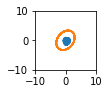

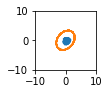

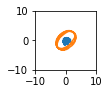

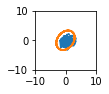

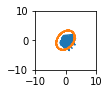

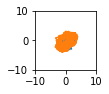

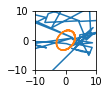

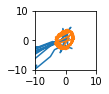

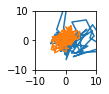

In [1]:
import numpy as np
import rebound
import matplotlib.pyplot as plt

ErisData = [1.6, 0.1163]

run_num = 100
sims = np.zeros((run_num,run_num))
color_map = np.zeros((run_num,run_num))
a_array = np.linspace(1.0,3.0,num=run_num, endpoint=True)
m_array = np.geomspace(1e-4,1e-2,num=run_num, endpoint=True)
for j in range(run_num):
    for k in range(run_num):
        sim = rebound.Simulation()
        sim.add(m=ErisData[0])
        a_num = a_array[j]
        m_num = m_array[k]
        sim.add(m = m_num, r = 0.0260, a = a_num, e = 0.243, inc = 33.961, Omega = 134.664, omega = 114, M = 210)
        sim.add(m = 2.65e-2, r = 0.0350, a = 3.7250, e = 0.006, inc = 62.097, Omega = 139.16, omega = 200, M = 137.277)

        sim.move_to_com()
#sim.status()
        rebound.OrbitPlot(sim)
        Noutputs = 100

        year = 2.*np.pi # One year in units where G=1
        times = np.linspace(0.,10000.*year, Noutputs)
        x = np.zeros((2,Noutputs))
        y = np.zeros((2,Noutputs))

        sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
        sim.move_to_com()        # We always move to the center of momentum frame before an integration
        ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

        for i,time in enumerate(times):
            sim.integrate(time)
            x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
            y[0][i] = ps[1].y
            x[1][i] = ps[2].x
            y[1][i] = ps[2].y
    
        #fig = plt.figure(figsize=(5,5))
        ax = plt.subplot(run_num+1,run_num+1,j+k+1)
        ax.set_xlim([-10,10])
        ax.set_ylim([-10,10])
#print(x[0],y[0],x[1],y[1])
        plt.plot(x[0], y[0]);
        plt.plot(x[1], y[1]);
        
        dist_arr = np.sqrt(x**2+y**2)
        max_dist = np.argmax(dist_arr)
        min_dist = np.argmin(dist_arr)
        
        delta_a = (max_dist-a_num)/a_num# - (a_num-min_dist)/a_num
        color_map[k][j] = delta_a
        if np.sqrt(x[0][-1]**2+y[0][-1]**2) > 20.0:
            sims[k][j] = False
        elif np.sqrt(x[1][-1]**2+y[1][-1]**2) > 20.0:
            sims[k][j] = False
        else:
            sims[k][j] = True
        print(sims[k][j], k, j)

np.savetxt('sims.txt',sims)
np.savetxt('color.txt', color_map)

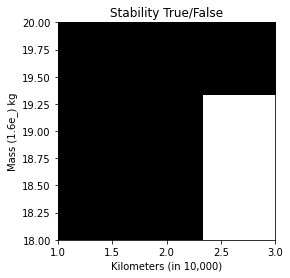

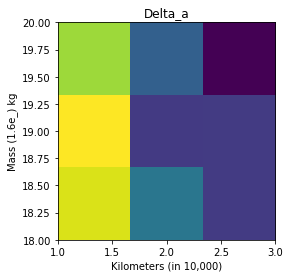

In [3]:
plt.imshow(np.flip(sims,axis=0), cmap='binary',extent=[1.0,3.0,18,20])
plt.xlabel('Kilometers (in 10,000)')
plt.ylabel('Mass (1.6e_) kg')
plt.title('Stability True/False')
plt.show()

plt.imshow(np.flip(color_map,axis=0), extent=[1.0,3.0,18,20])
plt.xlabel('SMA 1e4 km')
plt.ylabel('Log10 Mass kg')
plt.title('Delta_a')
plt.show()

Text(0, 0.5, 'Log10 Mass kg')

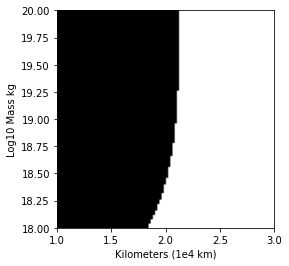

In [2]:
run_num = 100
a_array = np.linspace(10000,30000,num=run_num, endpoint=True)
m_array = np.geomspace(1.6e18,1.6e20,num=run_num, endpoint=True)
e_herc = 0.01
e_dys = 0.01
M_eris = 1.6e22
M_dys = 1.6e20
mhill_map = np.zeros((run_num,run_num))
sma_dys = 37211

for i in range(len(a_array)):
    sma_herc = a_array[i]
    for j in range(len(m_array)):
        m_herc = m_array[j]
        mhill = (sma_dys*(1-e_dys)-sma_herc*(e_dys+1))/(((M_dys/M_eris+m_herc/M_eris)/3)**(1/3)*0.5*(sma_herc+sma_dys))
        if mhill < 3.5:
            mhill_map[j][i] = False
        else:
            mhill_map[j][i] = True
            
#print(mhill_map)
plt.imshow(mhill_map, cmap='binary',extent=[1.0,3.0,18,20])
plt.xlabel('Kilometers (1e4 km)')
plt.ylabel('Log10 Mass kg')

In [4]:
print(33.961/180*np.pi,114.331/180*np.pi,134.665/180*np.pi,210.070/180*np.pi)

0.5927312672697942 1.995452387097637 2.3503476371981638 3.6664131596644878


In [6]:
print(62.097/180*np.pi,200.525/180*np.pi,139.169/180*np.pi,137.277/180*np.pi)

1.0837971056109188 3.4998214825616296 2.4289572667079886 2.3959356372602554
